In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
import matplotlib.image as img
import PIL.Image as Image
import cv2
import os
import numpy as np
import pathlib
import tensorflow_hub as hub


In [2]:
#data directory
data_dir = "D:\\python\\meow\\pruby\\ds\\rice\\Rice_Image_Dataset"
data_dir = pathlib.Path(data_dir)


In [3]:
#separate categories of the rice images
arborio = list(data_dir.glob('Arborio/*'))[:600]
basmati = list(data_dir.glob('Basmati/*'))[:600]
ipsala = list(data_dir.glob('Ipsala/*'))[:600]
jasmine = list(data_dir.glob('Jasmine/*'))[:600]
karacadag = list(data_dir.glob('Karacadag/*'))[:600]
#print amount of images in each category
print('Arborio:', len(arborio))
print('Basmati:', len(basmati))
print('Ipsati:', len(ipsala))
print('Jasmine:', len(jasmine))
print('Karacadag:', len(karacadag))


Arborio: 600
Basmati: 600
Ipsati: 600
Jasmine: 600
Karacadag: 600


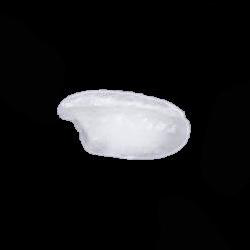

In [4]:
#show a sample image
Image.open(arborio[0])


In [5]:
#creating separate dictionary for images and their labels
rice_dict = {
    'Arborio': arborio,
    'Basmati': basmati,
    'Ipsala': ipsala,
    'Jasmine': jasmine,
    'Karacadag': karacadag
}

#numerical labels for each category
rice_labels = {
    'Arborio': 0,
    'Basmati': 1,
    'Ipsala': 2,
    'Jasmine': 3,
    'Karacadag': 4
}


In [6]:
#reshape images to 224x224
img_size = 224
X = []
y = []
#iterate through each category
for rice_name, images in rice_dict.items():
    #iterate through each image
    for image in images:
        #read image
        img = cv2.imread(str(image))
        #resize image
        img = cv2.resize(img, (img_size, img_size))
        #append image and its label to the output
        X.append(img)
        y.append(rice_labels[rice_name])
#convert list to numpy array
X = np.array(X)
y = np.array(y)
#normalize image data
X = X / 255
#reshape labels
y = y.reshape(-1, 1)
#show shape of data
print(X.shape)
print(y.shape)

    

(3000, 224, 224, 3)
(3000, 1)


In [7]:
#split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
#show shape of train and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(1920, 224, 224, 3)
(600, 224, 224, 3)
(1920, 1)
(600, 1)


In [8]:
#print validation set shape
print(X_val.shape)
print(y_val.shape)

(480, 224, 224, 3)
(480, 1)


In [9]:
#create model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5)
])
#compile model
model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
#train model
model.fit(X_train, y_train, epochs=10)
#evaluate model
model.evaluate(X_test, y_test, verbose=2)
#save model
model.save('rice_model.h5')

Epoch 1/10
60/60 [==============================] - 8s 12ms/step - loss: 2.4003 - accuracy: 0.7786
Epoch 2/10
60/60 [==============================] - 1s 11ms/step - loss: 0.1365 - accuracy: 0.9568
Epoch 3/10
60/60 [==============================] - 1s 11ms/step - loss: 0.1512 - accuracy: 0.9536
Epoch 4/10
60/60 [==============================] - 1s 11ms/step - loss: 0.1841 - accuracy: 0.9547
Epoch 5/10
60/60 [==============================] - 1s 11ms/step - loss: 0.1118 - accuracy: 0.9708
Epoch 6/10
60/60 [==============================] - 1s 11ms/step - loss: 0.1014 - accuracy: 0.9661
Epoch 7/10
60/60 [==============================] - 1s 11ms/step - loss: 0.0754 - accuracy: 0.9776
Epoch 8/10
60/60 [==============================] - 1s 11ms/step - loss: 0.1594 - accuracy: 0.9661
Epoch 9/10
60/60 [==============================] - 1s 11ms/step - loss: 0.0931 - accuracy: 0.9719
Epoch 10/10
60/60 [==============================] - 1s 11ms/step - loss: 0.1232 - accuracy: 0.9688
19/19 - 0

In [15]:
#visualize model
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(X_test)
print(predictions[0])
print(np.argmax(predictions[0]))
print(y_test[0])




[0.19606861 0.21082684 0.19270228 0.20951083 0.19089141]
1
[4]


In [ ]:
#most likely bad predictions due to low sample size to learn from